<a href="https://colab.research.google.com/github/valmeau/w07-final-project/blob/master/bvh_exploratory_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# W207 - Forest Cover Type Prediction

## Final Project Baseline

## Team:
- Brittney Van Hese
- Prabhaker Narsina
- Valérie Méausoone


### Setting up our environment

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Exploratory Data Analysis
We perform an EDA on the training dataset provided by the Kaggle competition.

#### Importing the data

In [4]:
train_df = pd.read_csv('input/train.csv', index_col='Id')
col_names = train_df.columns.tolist()

print("Column names:")
print(col_names)

print("\nSample data:")
train_df.head()

Column names:
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

Sample data:


Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                               
1        2596      51      3                               258   
2        2590      56      2                               212   
3        2804     139      9                               268   
4        2785     155     18                               242   
5        2595      45      2                               153   

    Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                    
1                                0                              510   
2                               -6                              390   
3                               65                             3180   
4                              118                             3090   
5                               -1                              391   

    Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Id                                                 
1             221             232            148   
2             220             235            151   
3             234             238            135   
4             238             238            122   
5             220             234            150   

    Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
Id                                      ...                             
1                                 6279  ...            0            0   
2                                 6225  ...            0            0   
3                                 6121  ...            0            0   
4                                 6211  ...            0            0   
5                                 6172  ...            0            0   

    Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
Id                                                                    
1             0            0            0            0            0   
2             0            0            0            0            0   
3             0            0            0            0            0   
4             0            0            0            0            0   
5             0            0            0            0            0   

    Soil_Type39  Soil_Type40  Cover_Type  
Id                                        
1             0            0           5  
2             0            0           5  
3             0            0           2  
4             0            0           2  
5             0            0           5  

[5 rows x 55 columns]

In [5]:
# Isolate target data
cover_type = train_df['Cover_Type']
y = np.array(cover_type)

# Dropping output from feature space
to_drop = ['Cover_Type']
cover_feat_space = train_df.drop(to_drop, axis = 1)

# Pull out geatures for future use
features = cover_feat_space.columns
X = np.array(cover_feat_space).astype(np.float)

print("Feature space hold %d observations and %d features" % X.shape)
print("Unique target labels:", np.unique(y))

Feature space hold 15120 observations and 54 features
Unique target labels: [1 2 3 4 5 6 7]


#### Assessing quality of data

In [6]:
# Assessing missingness
print("There are", np.count_nonzero(np.isnan(X)), "missing values among our features")
print("There are", np.count_nonzero(np.isnan(y)), "missing values among our target values")

#Assessing plausibility of values
print("\nLooking at summary statistics for our training data:")
train_df.describe()

There are 0 missing values among our features
There are 0 missing values among our target values

Looking at summary statistics for our training data:


Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...   Soil_Type32  \
count   15120.000000                        15120.000000  ...  15120.000000   
mean      135.091997                         1511.147288  ...      0.045635   
std        45.895189                         1099.936493  ...      0.208699   
min         0.000000                            0.000000  ...      0.000000   
25%       106.000000                          730.000000  ...      0.000000   
50%       138.000000                         1256.000000  ...      0.000000   
75%       167.000000                         1988.250000  ...      0.000000   
max       248.000000                         6993.000000  ...      1.000000   

        Soil_Type33   Soil_Type34   Soil_Type35   Soil_Type36   Soil_Type37  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.040741      0.001455      0.006746      0.000661      0.002249   
std        0.197696      0.038118      0.081859      0.025710      0.047368   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type38   Soil_Type39   Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  15120.000000  15120.000000  
mean       0.048148      0.043452      0.030357      4.000000  
std        0.214086      0.203880      0.171574      2.000066  
min        0.000000      0.000000      0.000000      1.000000  
25%        0.000000      0.000000      0.000000      2.000000  
50%        0.000000      0.000000      0.000000      4.000000  
75%        0.000000      0.000000      0.000000      6.000000  
max        1.000000      1.000000      1.000000      7.000000  

[8 rows x 55 columns]

The variables all have plausible distributions. We notice a negative minimum for "Vertical_Distance_To_Hydrology" but understand that it is plausible if the reference point is above that minimum value. 

#### Feature and target plots

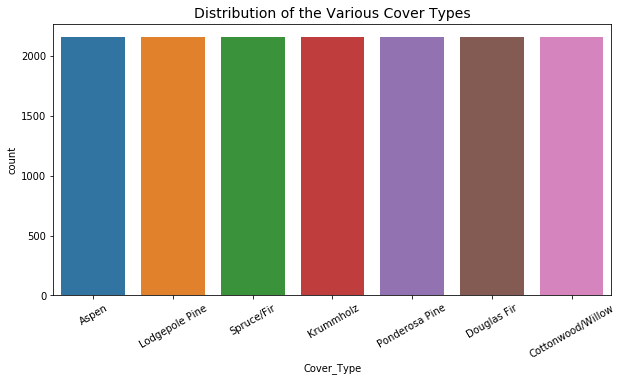

In [7]:
#Plotting the target
#Renaming the target labels to make them more meaningful
train_df['Cover_Type'].replace({1:'Spruce/Fir', 2: 'Lodgepole Pine', 3: 'Ponderosa Pine', 4: 'Cottonwood/Willow', 5: 'Aspen', 6: 'Douglas Fir', 7: ' Krummholz'}, inplace=True)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("Distribution of the Various Cover Types", size = 14)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax = sns.countplot(x = "Cover_Type", data = train_df)

<Figure size 1152x576 with 0 Axes>

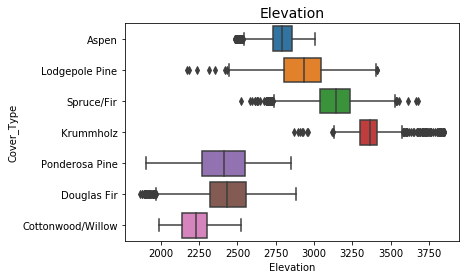

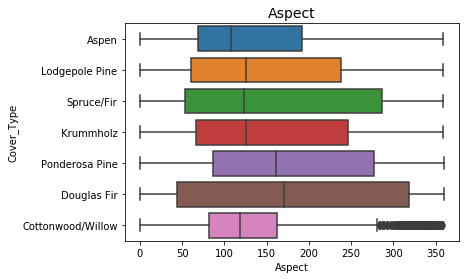

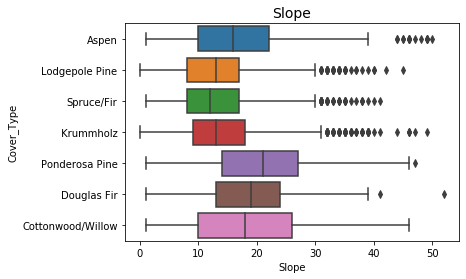

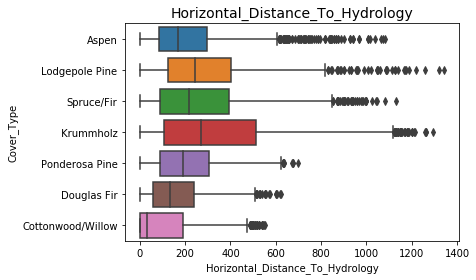

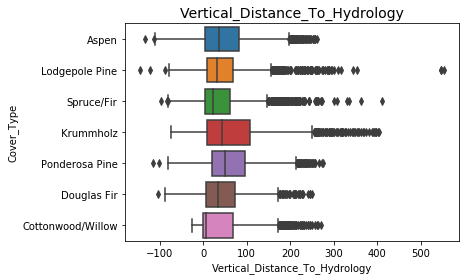

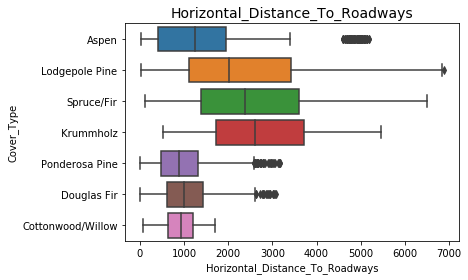

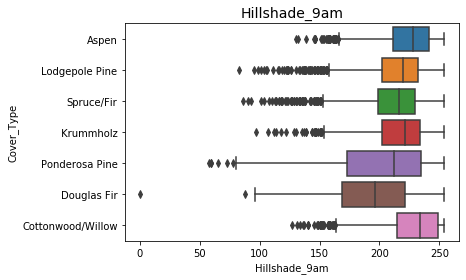

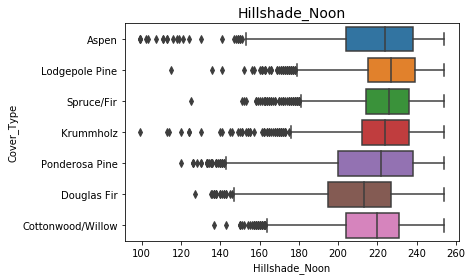

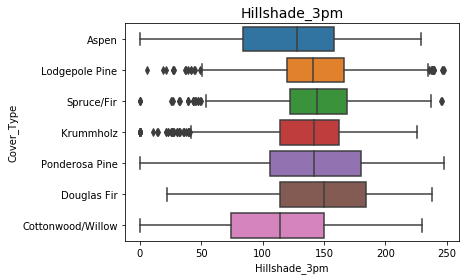

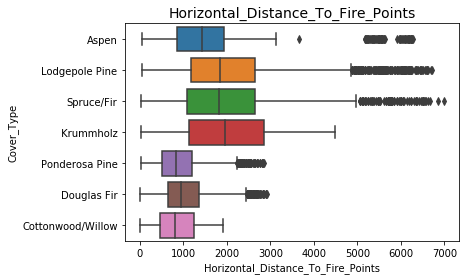

In [8]:
#Plotting and grouping numerical features according to target classes
plt.figure(figsize=(16, 8))

num_values_range = 10
# Iterate over the features, creating a subplot with a histogram for each one.
for feature in range(num_values_range):
    fig1, ax1 = plt.subplots()
    ax1.set_title(train_df.columns[feature], size = 14)
    ax1 = sns.boxplot(x = train_df.columns[feature], y = 'Cover_Type' , data = train_df)

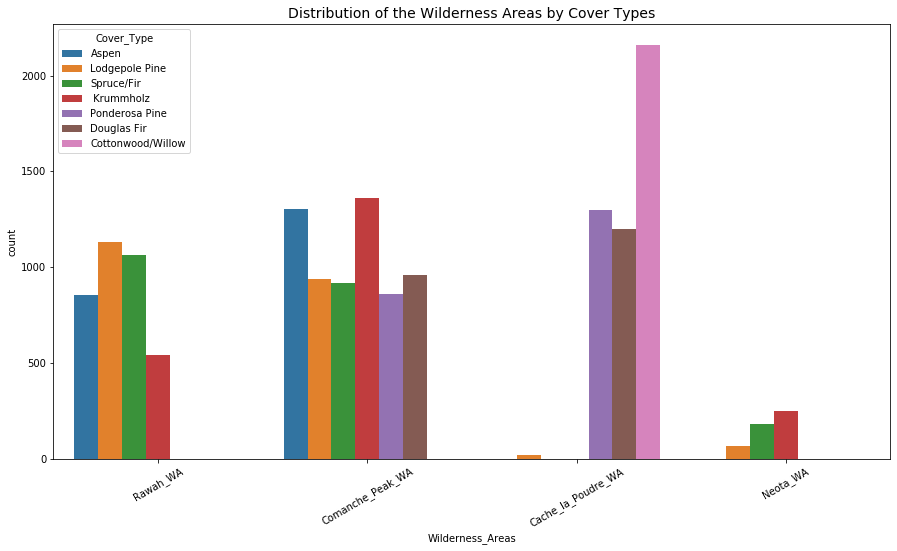

In [9]:
#Plotting catgorical features
#Transform binary into a few categorical variables, and giving them more meaningful names where possible
train_df = train_df.rename(columns={"Wilderness_Area1":"Rawah_WA","Wilderness_Area2":"Neota_WA",
"Wilderness_Area3":"Comanche_Peak_WA","Wilderness_Area4":"Cache_la_Poudre_WA"})
train_df['Wilderness_Areas'] = (train_df.iloc[:,10:14] == 1).idxmax(1)

fig, ax = plt.subplots(figsize=(15,8))
ax.set_title("Distribution of the Wilderness Areas by Cover Types", size = 14)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax = sns.countplot(x = "Wilderness_Areas", hue = "Cover_Type", data = train_df)

In [10]:
train_df['Soil_Type'] = (train_df.iloc[:,15:55] == 1).idxmax(1)
fig = px.histogram(train_df, x="Soil_Type", color="Cover_Type", title='Distribution of the Soil Types by Cover Types',)
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

#### Covariance Matrix

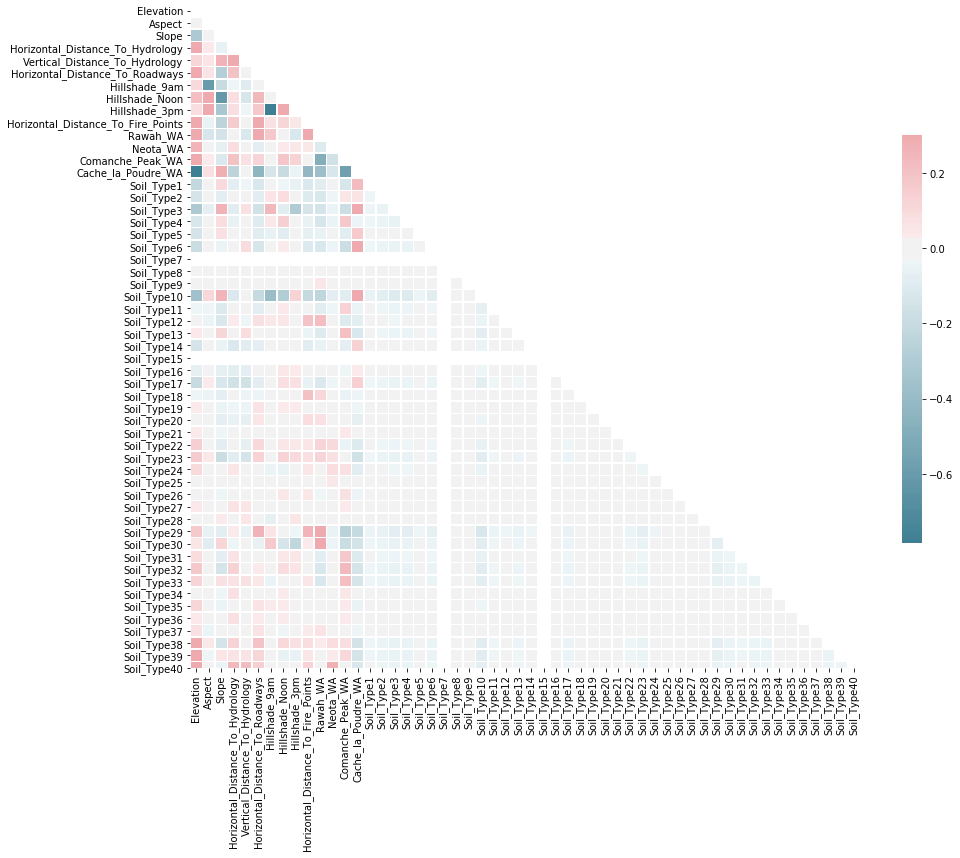

In [11]:
# Compute the correlation matrix
corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Prabhu's Changes start here

In [42]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize

# 70% train, 30% test
lable_classes = classes=[1, 2, 3,4,5,6,7]

y_binarized = label_binarize(y, lable_classes)

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y_binarized,
    test_size=0.3, random_state=17)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from  sklearn.metrics import classification_report

import numpy as np

def ml_pipleline(ml_name, model,X_train, y_train, X_valid, y_valid, detailedCVcharts = False):
    
    ml_pipe = Pipeline([('scaler', StandardScaler()), 
                       (ml_name, OneVsRestClassifier(model))]) 
    
    ml_pipe.fit(X_train, y_train)

    y_predict = ml_pipe.predict(X_valid)
    report = classification_report(y_predict, y_valid)
  
    print(color.BOLD, ml_name, color.END, '\n')
    print('Metrics: \n ', report)

    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
#     print('Cross Validation Scores:', cv_scores)
    print('\n Cross Validation Average Score', np.mean(cv_scores))
    

    if detailedCVcharts:
        fig = plt.figure(figsize=(14,12))
        plt.tight_layout()

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        lw = 2

        for i in range(len(lable_classes)):
            fpr[i], tpr[i], _ = roc_curve(y_valid[:, i], y_predict[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            sp = fig.add_subplot(3, 3, i+1)
            sp.set_title('cover_class ' + str( lable_classes[i]))
            plt.plot(fpr[i], tpr[i], color='darkorange',
                     lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
            plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend(loc="lower right")

        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
        plt.show() 
    

 KNN with 1  Neighbors  

Metrics: 
                precision    recall  f1-score   support

           0       0.65      0.70      0.68       594
           1       0.60      0.69      0.64       567
           2       0.67      0.79      0.73       568
           3       0.94      0.87      0.90       702
           4       0.94      0.82      0.87       710
           5       0.79      0.72      0.75       698
           6       0.96      0.92      0.94       697

   micro avg       0.79      0.79      0.79      4536
   macro avg       0.79      0.79      0.79      4536
weighted avg       0.80      0.79      0.80      4536
 samples avg       0.79      0.79      0.79      4536


 Cross Validation Average Score 0.8339955838068157


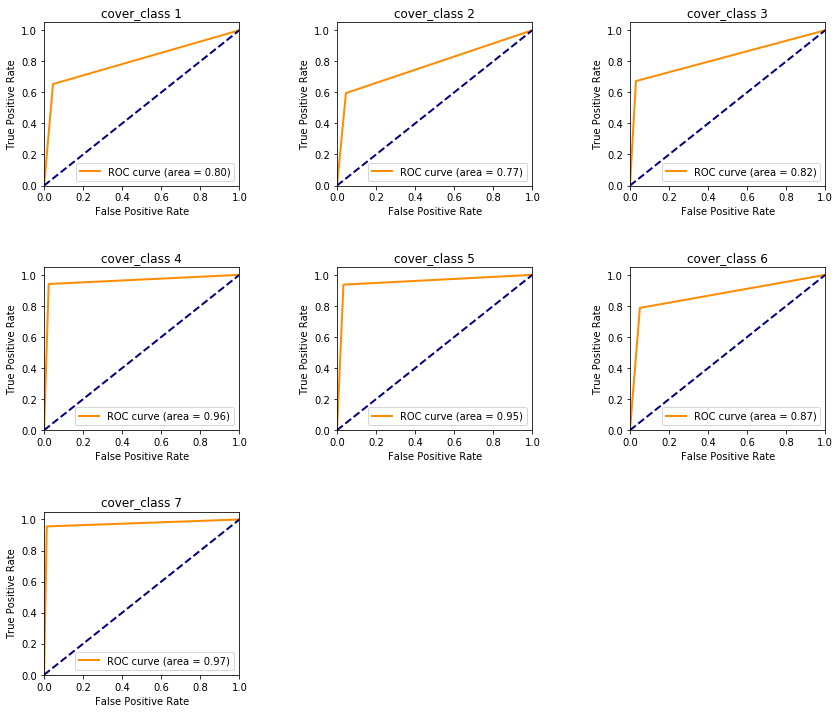

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.



 KNN with 3  Neighbors  

Metrics: 
                precision    recall  f1-score   support

           0       0.60      0.69      0.64       553
           1       0.56      0.71      0.62       515
           2       0.64      0.81      0.72       529
           3       0.95      0.86      0.90       718
           4       0.94      0.79      0.86       735
           5       0.77      0.74      0.75       666
           6       0.95      0.92      0.93       695

   micro avg       0.77      0.80      0.78      4411
   macro avg       0.77      0.79      0.78      4411
weighted avg       0.80      0.80      0.79      4411
 samples avg       0.77      0.77      0.77      4411


 Cross Validation Average Score 0.7968637709720088


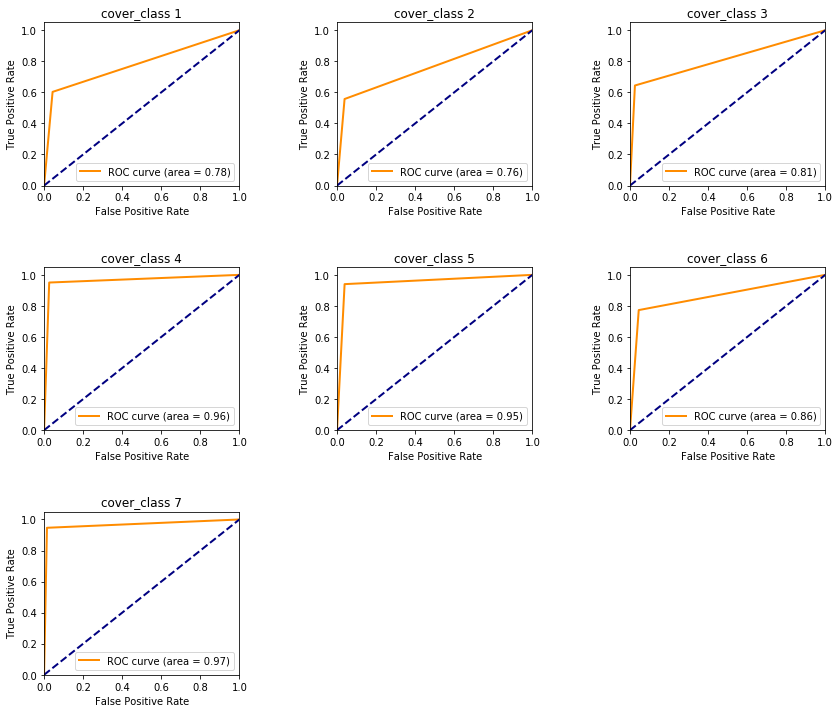

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.



 KNN with 5  Neighbors  

Metrics: 
                precision    recall  f1-score   support

           0       0.58      0.68      0.63       537
           1       0.53      0.70      0.60       493
           2       0.61      0.81      0.69       502
           3       0.94      0.85      0.89       715
           4       0.93      0.79      0.85       732
           5       0.74      0.72      0.73       656
           6       0.92      0.92      0.92       677

   micro avg       0.75      0.79      0.77      4312
   macro avg       0.75      0.78      0.76      4312
weighted avg       0.77      0.79      0.77      4312
 samples avg       0.75      0.75      0.75      4312


 Cross Validation Average Score 0.7646456424454356


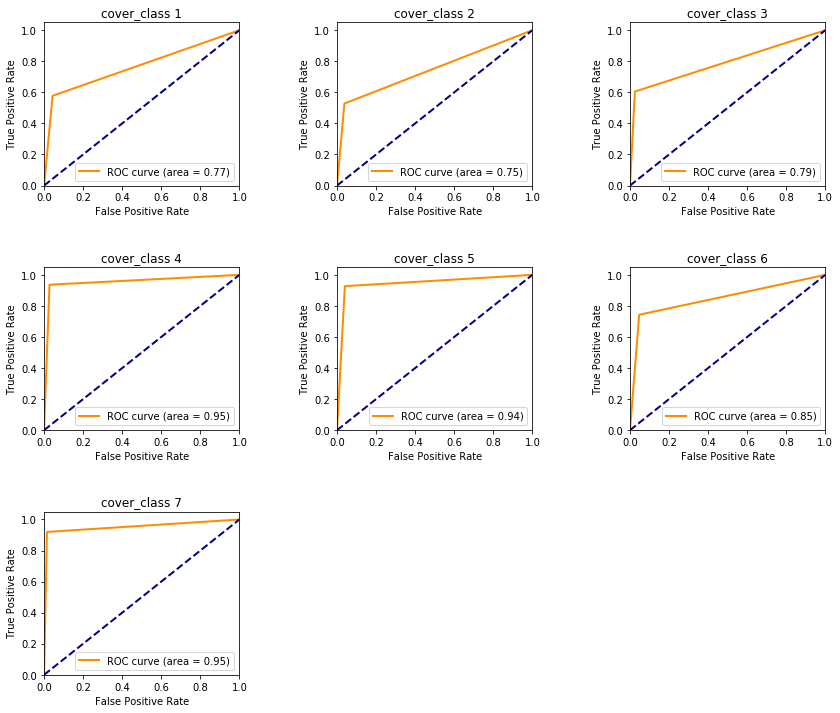

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.



 KNN with 7  Neighbors  

Metrics: 
                precision    recall  f1-score   support

           0       0.57      0.69      0.62       523
           1       0.50      0.70      0.58       464
           2       0.58      0.81      0.68       485
           3       0.93      0.85      0.89       707
           4       0.90      0.80      0.84       696
           5       0.73      0.71      0.72       656
           6       0.92      0.92      0.92       674

   micro avg       0.73      0.79      0.76      4205
   macro avg       0.73      0.78      0.75      4205
weighted avg       0.76      0.79      0.77      4205
 samples avg       0.73      0.73      0.73      4205


 Cross Validation Average Score 0.7393235762953602


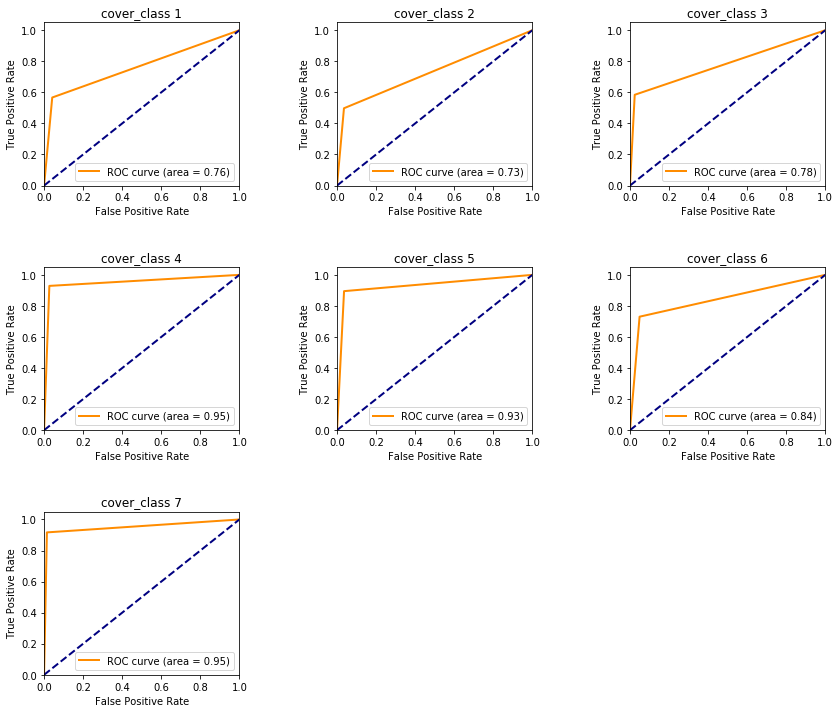

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.



 KNN with 9  Neighbors  

Metrics: 
                precision    recall  f1-score   support

           0       0.55      0.67      0.61       518
           1       0.47      0.71      0.57       435
           2       0.56      0.80      0.66       466
           3       0.93      0.85      0.89       713
           4       0.87      0.79      0.83       690
           5       0.71      0.70      0.70       649
           6       0.90      0.92      0.91       660

   micro avg       0.71      0.78      0.75      4131
   macro avg       0.71      0.78      0.74      4131
weighted avg       0.74      0.78      0.76      4131
 samples avg       0.71      0.71      0.71      4131


 Cross Validation Average Score 0.7190103371765282


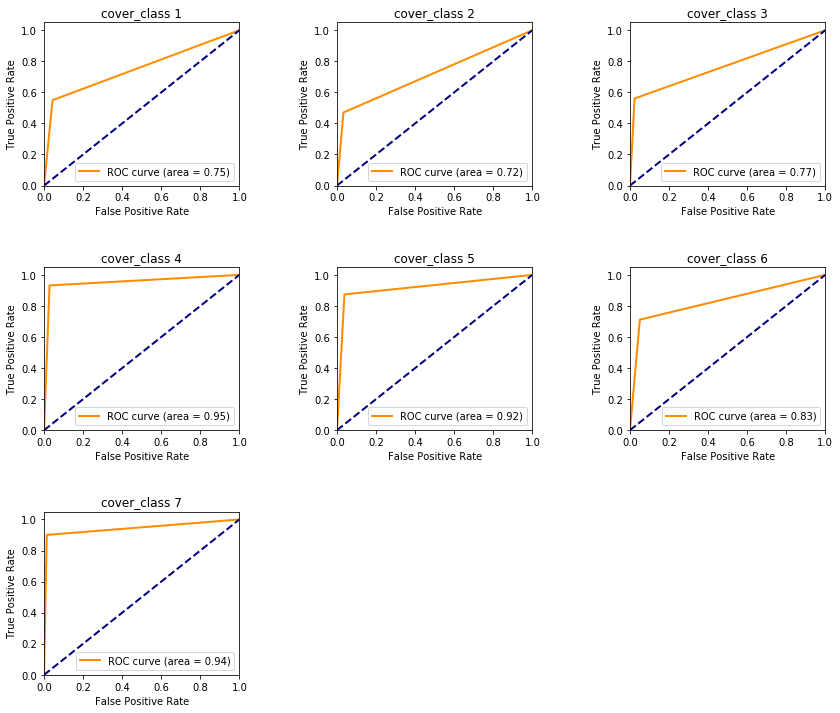

In [46]:
# KNN Neighborhood
knn_values = [1,3,5,7,9]
# knn_values = [3]
for value in knn_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=value)
    ml_pipleline('KNN with '+ str(value) +'  Neighbors', knn_classifier, X_train, y_train, X_valid, y_valid,\
                 detailedCVcharts = True )
                       

**Using different distance metric **